# **WEB SCRAPING TECHNIQUES**

## [1. WEB SCRAPING TUTORIAL WITH PYTHON: Tips and Tricks](https://hackernoon.com/web-scraping-tutorial-with-python-tips-and-tricks-db070e70e071)

### 1.1 BASIC IDEA
**Web scraping is a technique used to extract data from websites through an automated process.**

### 1.2. USE CASES
- [scrape pages of a e-retailer](https://twitter.com/plloyduk/status/935593622141063169) to spot if some of the clothes you want to buy got discounted
- [compare prices](https://towardsdatascience.com/data-driven-lingerie-shopping-6dc61c57f97f) of several clothes brands by scraping their pages
- price of the flight tickets can vary during the day. One could crawl the travel website and get alarmed once the price was lowered
- analyze the action websites to answer the question if starting bid should be low or high to attract more bidders or if the longer auction correlates with a higher end bid

### 1.3 AVAILABLE PACKAGES AND TOOLS

#### 1.3.1 HTML

Extract data straight from html using *inspect* option from the browser. More about HTML [here](https://www.quora.com/What-is-the-difference-between-class-and-id-in-HTML). It is also highly customisable: run different spiders on different processes, disable cookies and set download delays. It can also be used to extract data using API. However, the learning curve is not smooth for the new programmers: you need to read tutorials and examples to get started.

#### 1.3.2 Scrapy

Scrapy is stand-alone ready-to-use data extracting framework. Apart from extracting HTML the package offers lots of functionalities like exporting data in formats, logging etc.

#### 1.3.3 BeautifulSoup with Requests

BeautifulSoup is a library that allows you to parse the HTML source code in a beautiful way. Along with it you need a Request library that will fetch the content of the url. However, you should take care of everything else like error handling, how to export data, how to parallelize the web scraper, etc.

### 1.4 BASIC CODE



In [2]:
from bs4 import BeautifulSoup
import requests

# link to the webpage from which we want to extract the data
page_link = 'https://www.ceneo.pl/68061601'

# fetch the content from url
page_response = requests.get(page_link, timeout=5)                     # type: requests.models.Response

# parse html
page_content = BeautifulSoup(page_response.content, 'html.parser')     # type: bs4.BeautifulSoup
#page_content.prettify()

In [3]:
# all of the items are BeautifulSoup objects
[type(item) for item in list(page_content.children)][8:12]               # the most important is 'Tag'

[bs4.element.Comment,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [4]:
price_value = int(page_content.find_all('span', class_='value')[0].get_text())
print('Price of the product is {} PLN'.format(price_value))

Price of the product is 3999 PLN


In [5]:
product_price = page_content.find_all('span', class_='product-price')
#page_content.find_all('span', class_='value')
type(product_price)

bs4.element.ResultSet

In [11]:
# you can also access the main_price class by specifying the tag of the class
prices = page_content.find_all('span', attrs={'class':'value'})
prices

[<span class="value">3999</span>,
 <span class="value">3999</span>,
 <span class="value">3999</span>,
 <span class="value">930</span>,
 <span class="value">2599</span>,
 <span class="value">806</span>,
 <span class="value">1971</span>,
 <span class="value">1799</span>]

### ADITIONAL MATERIALS

[Web Scraping tutorial python](https://www.dataquest.io/blog/web-scraping-tutorial-python/)

## [2. SCRAPING THE INTERNET'S MOST POPULAR WEBSITES](https://towardsdatascience.com/scraping-the-internets-most-popular-websites-a4c6f0be382d)

Various companies/individuals use automated programs (robots) to collect data and robots.txt is a file that many websites have that regulate where robots are allowed on their site. You can find a site’s robots.txt by entering in the url + /robots.txt.

User-agent designates which bot the directions belong to (User-agent: * means all users). Disallow tells robots where not to go, and allow tells robots where they may go.

Before webscraping, you should check the website’s robot.txt whether it is allowed to extract information from websites.

## [3. WEBSCRAPING, REGULAR EXPRESIONS AND DATA VISUALIZATION](https://towardsdatascience.com/web-scraping-regular-expressions-and-data-visualization-doing-it-all-in-python-37a1aade7924)

### 3.1 INTRODUCTION

This notebook is meant to serve as a small example project of how to get data from the web using Python. Here we will scrape the data from the web, parse the results using regular expressions, and visualize the data. This small project could probably be done a lot more efficiently by hand, but the ideas here are powerful and can be extended to much larger applications. There are many tools that a data scientist will need to use, and web scraping, regular expressions, and visualization are all good techniques to practice.

### 3.2 WEB SCRPING USING REQUESTS AND BEAUTIFUL SOUP

In [17]:
# requests for fetching html of website
from bs4 import BeautifulSoup
import requests

# Make the request to a url
url = 'http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'
page_response = requests.get(url)

# Create soup from content of request
soup = BeautifulSoup(page_response.content)

# Find the element on the webpage
main_content = soup.find('div', attrs = {'class': 'entry-content'})

# Extract the relevant information
content = main_content.find('ul').text
print(content)


Grant Cornwell, College of Wooster (left in 2015): $911,651
Marvin Krislov, Oberlin College (left in 2016):  $829,913
Mark Roosevelt, Antioch College, (left in 2015): $507,672
Laurie Joyner, Wittenberg University (left in 2015): $463,504
Richard Giese, University of Mount Union (left in 2015): $453,800
Sean Decatur,Kenyon College: $451,698
Adam Weinberg, Denison University: $435,322
Daniel Dibiasio, Ohio Northern University: $414,716
Denvy Bowman, Capital University (left in 2016): $388,570
Anne Steele, Muskingum University (left in 2016): $384,233
Kathy Krendl, Otterbein University:  $378,035
Rockwell Jones, Ohio Wesleyan University: $366,625
Robert Helmer, Baldwin Wallace University: $365,616
Robert Huntington, Heidelberg University: $300,005
Lori Varlotta, Hiram College: $293,336
Joseph Bruno, Marietta College (left in 2016): $288,295
W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761



We know have the data we need to focus on as a text string. The next step is to parse this information using regular expressions to identify the presidents, colleges, and salaries. Regular Expressions are intimidating at first, and require practice to learn to use effectively. I am definitely not an expert, and am using this project partly to get more familiar with regular expressions. The best place to get started is simply with the Python Documentation for the re library.

### 3.2 REGULAR EXPRESIONS

#### 3.2.1 Presidents

In [29]:
import re

# create pattern to extract names
extract_names = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)

# extract names
names = extract_names.findall(content)
names[:3]

['Grant Cornwell', 'Marvin Krislov', 'Mark Roosevelt']

#### 3.2.2 Colleges

In [30]:
# create pattern to extract colleges
extract_colleges = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')

# extract colleges
colleges = extract_colleges.findall(content)
colleges[:3]

['College of Wooster', 'Oberlin College', 'Antioch College']

#### 3.2.3 Salaries

In [31]:
# create pattern to extract sallaries
extract_salaries = re.compile(r'\$.+')

# extract sallaries
salaries = extract_salaries.findall(content)

# convert string to float
salaries = [int(''.join(s[1:].split(','))) for s in salaries]
salaries[:3]

[911651, 829913, 507672]

In [33]:
# Sanity check to make sure everything is correct!
len(names) == len(colleges) == len(salaries)

True

### 3.3 VISUALIZAION

In [54]:
import pandas as pd

# convert to a dataframe
df = pd.DataFrame({'salary': salaries, 
                   'President': names,
                   'College': colleges})

# visualize first five rows
df.head()

,salary,President,College
0,911651,Grant Cornwell,College of Wooster
1,829913,Marvin Krislov,Oberlin College
2,507672,Mark Roosevelt,Antioch College
3,463504,Laurie Joyner,Wittenberg University
4,453800,Richard Giese,University of Mount Union


In [55]:
# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index().drop(columns='index')

df.head()

,salary,President,College
0,911651,Grant Cornwell,College of Wooster
1,829913,Marvin Krislov,Oberlin College
2,507672,Mark Roosevelt,Antioch College
3,463504,Laurie Joyner,Wittenberg University
4,453800,Richard Giese,University of Mount Union


In [56]:
# first quick visualization
#df.plot(kind='barh', x = 'President', y = 'salary')

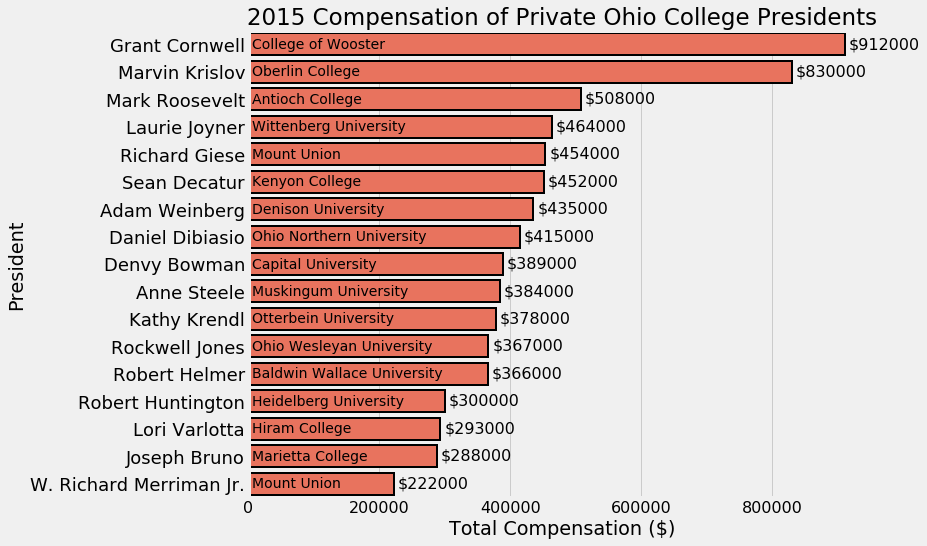

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pick a style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

import seaborn as sns

# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index()

# Shorten this one name for plotting
df.loc[df['College'] == 'University of Mount Union', 'College'] = 'Mount Union'

# Create the basic figure
plt.figure(figsize=(10, 8))
sns.barplot(x = 'salary', y = 'President', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# Add text showing values and colleges
for i, row in df.iterrows():
  plt.text(x = row['salary'] + 6000, y = i + 0.15, s = '$%d' % (round(row['salary'] / 1000) * 1000))
  plt.text(x = 5000, y = i + 0.15, s = row['College'], size = 14)

# Labels are a must!
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [59]:
# Calculate value of 5 minutes of your presidents time
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['salary'].sum())
total_df['five_minutes_cost'] = round(total_df['salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df.head()

,College,salary,five_minutes_cost
0,College of Wooster,911651,38.0
1,Oberlin College,829913,35.0
2,Mount Union,675561,28.0
3,Antioch College,507672,21.0
4,Kenyon College,451698,19.0


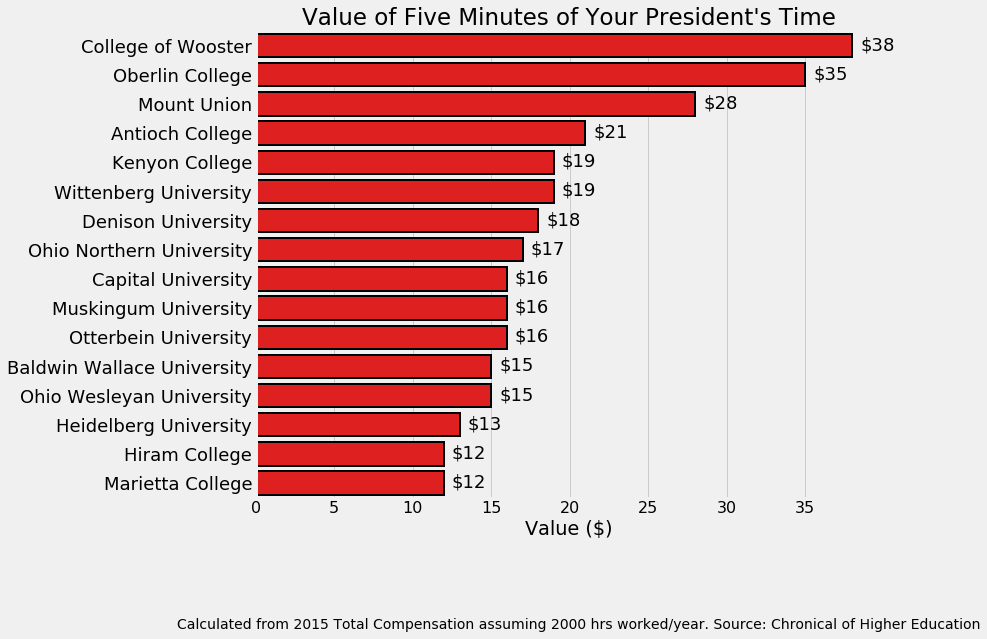

In [60]:
# Text for caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# Create the basic barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# Add the text with the value
for i, row in total_df.iterrows():
  plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, 
           s = '$%d' % (row['five_minutes_cost']), size = 18)

# Add the caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# Add the labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");

### 3.4 ADDITIONAL MATERIALS

- [Regular Expressions (Regex) Tutorial: How to Match Any Pattern of Text [Video]](https://www.youtube.com/watch?v=sa-TUpSx1JA)
- [Regular Expression Cheat Sheet](http://www.cbs.dtu.dk/courses/27610/regular-expressions-cheat-sheet-v2.pdf)
- [Regular Expresions online generator](https://regex101.com/)

## [4. AUTOMATE THE BORING STUFF WITH PYTHON - CHAPTER 11: WEB SCRAPING](https://automatetheboringstuff.com/chapter11/)

### 4.1 WEBBROWSER MODULE

A web browser tab will open to the URL http://inventwithpython.com/. This is about the only thing the webbrowser module can do. Even so, the open() function does make some interesting things possible. For example, it’s tedious to copy a street address to the clipboard and bring up a map of it on Google Maps. You could take a few steps out of this task by writing a simple script to automatically launch the map in your browser using the contents of your clipboard. This way, you only have to copy the address to a clipboard and run the script, and the map will be loaded for you.

In [90]:
# open webbrowser with python
import webbrowser
webbrowser.open('https://laskowskimarcin.com')

True

In [126]:
def mapIt(place):
        
    # assert that input is string
    assert type(place) == str, 'Sorry my friend, but the input is not a string - Try again!'
    
    # modify string
    place_url = place.replace(" ", "+")
    
    # open webbrowser
    import webbrowser
    place_link = 'https://www.google.com/maps/place/' + place_url
    webbrowser.open(place_link)

In [127]:
mapIt('Los Angeles')

### 4.2 DOWNLOAD FILES FROM WEB WITH REQUEST MODULE

In [134]:
import requests

# make a request of the webpage
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')

# check whether the request is ok
res.raise_for_status()

# save a .txt file
File = open('./data/RomeoAndJuliet.txt', 'wb')
for chunk in res.iter_content(1000000):
    File.write(chunk)
File.close()

## [5. MAKING WEB CRAWLERS USING SCRAPY FOR PYTHON](https://www.datacamp.com/community/tutorials/making-web-crawlers-scrapy-python)

### 5.1 SCRAPY OVERVIEW

Web scraping has become an effective way of extracting information from the web for decision making and analysis. It has become an essential part of the data science toolkit. Data scientists should know how to gather data from web pages and store that data in different formats for further analysis.

**Scrapy provides a powerful framework for extracting the data, processing it and then save it.**

### 5.2 SCRAPY vs BEAUTIFULSOUP

#### 5.2.1 SCRAPY

**Scrapy** is a Python framework for web scraping that provides a complete package for developers without worrying about maintaining code.

1. Scrapy is the complete package for downloading web pages, processing them and save it in files and databases
2. Scrapy is a powerhouse for web scraping and offers a lot of ways to scrape a web page. It requires more time to learn and understand how Scrapy works but once learned, eases the process of making web crawlers and running them from just one line of command. Becoming an expert in Scrapy might take some practice and time to learn all functionalities.
3. Scrapy can get big jobs done very easily. It can crawl a group of URLs in no more than a minute depending on the size of the group and does it very smoothly as it uses Twister which works asynchronously (non-blocking) for concurrency.
4. Scrapy provides Item pipelines that allow you to write functions in your spider that can process your data such as validating data, removing data and saving data to a database. It provides spider Contracts to test your spiders and allows you to create generic and deep crawlers as well. It allows you to manage a lot of variables such as retries, redirection and so on.


#### 5.2.2 BEAUTIFULSOUP

**Beautiful Soup** is also widely used for web scraping. It is a Python package for parsing HTML and XML documents and extract data from them. It is available for Python 2.6+ and Python 3.

1. BeautifulSoup is basically an HTML and XML parser and requires additional libraries such as requests, urlib2 to open URLs and store the result [6]
2. BeautifulSoup is relatively easy to understand for newbies in programming and can get smaller tasks done in no time
3. BeautifulSoup is used for simple scraping jobs with efficiency. It is slower than Scrapy if you do not use multiprocessing.
4. If the project does not require much logic, BeautifulSoup is good for the job, but if you require much customization such as proxys, managing cookies, and data pipelines, Scrapy is the best option.


### 5.3 SCRAPY OVERVIEW

#### 5.3.1 Scrapy Shell

In [ ]:
!scrapy shell

#### 5.3.2 Run crowlers on webpage

In [ ]:
!fetch("https://www.ceneo.pl/24498768")

#### 5.3.3 See the response

In [ ]:
!view(response)

#### 5.3.4 View the raw HTML script

In [ ]:
!print(response.text)

#### 5.3.5 Extract values using the element attributes or the css selector like classes

In [ ]:
!response.css(".product::text").extract()

## 6. SUMMARY

### 6.1 REQUESTS

http://docs.python-requests.org/en/master/

As a preparation step to parsing, we can use Requests to download HTML and other files from the internet. Note: this library uses urllib3 under the hood.



### 6.2 BEAUTIFUL SOUP

https://pypi.org/project/beautifulsoup4/

This web-scraping library is used for parsing HTML.
Because of its ease of use, it is often recommended for beginners.



### 6.3 SELENIUM

https://selenium-python.readthedocs.io/

Unlike Requests/Beautiful Soup, Selenium opens a visible browser window when you run the code. It can be used to simulate mouse clicks and key presses, as well as select elements of the page. One of the main use cases for this library is testing a website during development.

### 6.4 SCRAPY

https://doc.scrapy.org/en/latest/index.html

Capable of ‘asynchronous networking’ (parallel, so faster), Scrapy is the most powerful and also the most difficult to learn of the libraries discussed so far.

